In [ ]:
!unzip Data.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/Data/Train/peace/peace_975.png  
  inflating: data/Data/Train/peace/peace_785.png  
  inflating: data/Data/Train/peace/peace_791.png  
  inflating: data/Data/Train/peace/peace_949.png  
  inflating: data/Data/Train/peace/peace_1034.png  
  inflating: data/Data/Train/peace/peace_578.png  
  inflating: data/Data/Train/peace/peace_1752.png  
  inflating: data/Data/Train/peace/peace_1746.png  
  inflating: data/Data/Train/peace/peace_1020.png  
  inflating: data/Data/Train/peace/peace_222.png  
  inflating: data/Data/Train/peace/peace_1008.png  
  inflating: data/Data/Train/peace/peace_544.png  
  inflating: data/Data/Train/peace/peace_550.png  
  inflating: data/Data/Train/peace/peace_236.png  
  inflating: data/Data/Train/peace/peace_1949.png  
  inflating: data/Data/Train/peace/peace_1791.png  
  inflating: data/Data/Train/peace/peace_1785.png  
  inflating: data/Data/Train/peace/peace_587.png  
  inflating: data/Data/

In [ ]:
#import tensorflow as tf
#import tflearn
#from tflearn.layers.conv import conv_2d,max_pool_2d
#from tflearn.layers.core import input_data,dropout,fully_connected
#from tflearn.layers.estimator import regression
#import numpy as np
#import cv2
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#Load Images from Fist
X_train = []
for i in range(0, 2000):
    name = 'data/Data/Train/fist/fist_' + str(i) + '.png'
    print(name)
    image = cv2.imread('data/Data/Train/fist/fist_' + str(i) + '.png')
    print(type(image))
    print(image.shape)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    print("gray_img shape", gray_image.shape)
    X_train.append(gray_image.reshape(89,100,1))

#Load Images From Hi
for i in range(0, 2000):
    name2 = 'data/Data/Train/hi/hi_' + str(i) + '.png'
    print(name2)
    image = cv2.imread('data/Data/Train/hi/hi_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    X_train.append(gray_image.reshape(89, 100, 1))
    
#Load Images From Peace
for i in range(0, 2000):
    name3 = 'data/Data/Train/peace/peace_' + str(i) + '.png'
    print(name3)
    image = cv2.imread('data/Data/Train/peace/peace_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    X_train.append(gray_image.reshape(89, 100, 1))

Streaming output truncated to the last 5000 lines.
data/Data/Train/fist/fist_1750.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1751.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1752.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1753.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1754.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1755.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1756.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1757.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1758.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1759.png
<class 'numpy.ndarray'>
(215, 24

In [ ]:
X_train = np.array(X_train)

In [ ]:
loadedImages.shape

(6000, 89, 100, 1)

In [ ]:
# Create OutputVector

#basically one hot encoding of labels 1-1000 - > 1,0,0, 1001 - 2000 -> 0,1,0, 2001 - 3000 - > 0,0,1

Y_train = []
for i in range(0, 2000):
    Y_train.append([1, 0, 0])

for i in range(0, 2000):
    Y_train.append([0, 1, 0])

for i in range(0, 2000):
    Y_train.append([0, 0, 1])

In [ ]:
Y_train = np.array(Y_train)

In [ ]:
X_test = []

#Load Images for swing
for i in range(2000, 3000):
    image = cv2.imread('data/Data/Test/fist/fist_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    X_test.append(gray_image.reshape(89, 100, 1))

#Load Images for Palm
for i in range(2000, 3000):
    image = cv2.imread('data/Data/Test/hi/hi_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    X_test.append(gray_image.reshape(89, 100, 1))
    
#Load Images for Fist
for i in range(2000, 3000):
    image = cv2.imread('data/Data/Test/peace/peace_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    X_test.append(gray_image.reshape(89, 100, 1))

In [ ]:
X_test = np.array(X_test)
type(X_test)

numpy.ndarray

In [ ]:
Y_test = []

for i in range(0, 1000):
    Y_test.append([1, 0, 0])
    
for i in range(0, 1000):
    Y_test.append([0, 1, 0])

for i in range(0, 1000):
    Y_test.append([0, 0, 1])

In [ ]:
Y_test = np.array(Y_test)
Y_test.shape
print(Y_test)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [ ]:
model = Sequential()
model.add(Conv2D(32 , (2,2) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (89,100,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 1 , padding = 'same'))
model.add(Conv2D(64 , (2,2) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 1 , padding = 'same'))
model.add(Conv2D(128 , (2,2) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))


model.add(Conv2D(256 , (2,2) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (2,2) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (2,2) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))


model.add(Flatten())
model.add(Dense(units = 1000 , activation = 'relu'))
model.add(Dropout(0.6))
#model.add(Dense(units = 24 , activation = 'softmax'))
model.add(Dense(units = 3 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 89, 100, 32)       160       
_________________________________________________________________
batch_normalization (BatchNo (None, 89, 100, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 100, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 89, 100, 64)       8256      
_________________________________________________________________
dropout (Dropout)            (None, 89, 100, 64)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 89, 100, 64)       256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 89, 100, 64)       0

In [ ]:
loadedImages, outputVectors = shuffle(loadedImages, outputVectors, random_state=0)

from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# Train model
history = model.fit(loadedImages, outputVectors, epochs=35,
           validation_data = (X_test, Y_test),
           verbose = 2, callbacks = [learning_rate_reduction])

Epoch 1/35
188/188 - 1030s - loss: 1.5287 - accuracy: 0.6845 - val_loss: 0.9846 - val_accuracy: 0.6747
Epoch 2/35
188/188 - 1025s - loss: 0.6441 - accuracy: 0.7527 - val_loss: 0.9978 - val_accuracy: 0.6690
Epoch 3/35
188/188 - 1028s - loss: 0.5354 - accuracy: 0.7697 - val_loss: 1.0552 - val_accuracy: 0.6750
Epoch 4/35
188/188 - 1025s - loss: 0.5507 - accuracy: 0.7708 - val_loss: 1.8941 - val_accuracy: 0.6247
Epoch 5/35
188/188 - 1023s - loss: 0.5247 - accuracy: 0.7780 - val_loss: 1.0163 - val_accuracy: 0.6837
Epoch 6/35
188/188 - 1024s - loss: 0.5018 - accuracy: 0.7890 - val_loss: 1.1611 - val_accuracy: 0.6807
Epoch 7/35
188/188 - 1023s - loss: 0.4988 - accuracy: 0.7862 - val_loss: 1.2195 - val_accuracy: 0.6937
Epoch 8/35
188/188 - 1025s - loss: 0.6164 - accuracy: 0.7670 - val_loss: 8.7176 - val_accuracy: 0.4723
Epoch 9/35

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 - 1025s - loss: 0.5793 - accuracy: 0.7675 - val_loss: 1.0549 - val_accuracy:

In [ ]:
model.save("FinalModel.tfl")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: FinalModel.tfl/assets


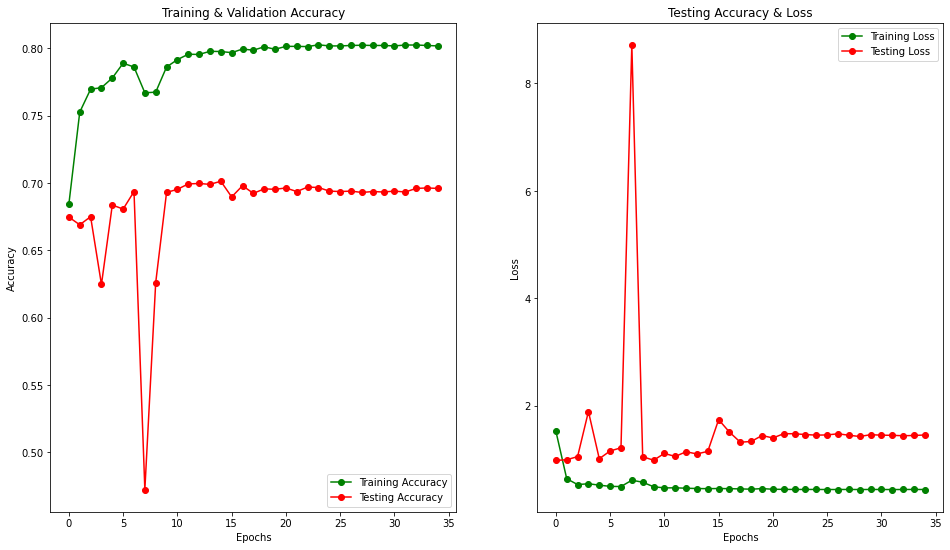

In [ ]:
import matplotlib.pyplot as plt 

epochs = [i for i in range(35)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
from google.colab import files
!zip -r FinalModel.zip /content/FinalModel.tfl

  adding: content/FinalModel.tfl/ (stored 0%)
  adding: content/FinalModel.tfl/assets/ (stored 0%)
  adding: content/FinalModel.tfl/saved_model.pb (deflated 91%)
  adding: content/FinalModel.tfl/variables/ (stored 0%)
  adding: content/FinalModel.tfl/variables/variables.index (deflated 74%)
  adding: content/FinalModel.tfl/variables/variables.data-00000-of-00001 (deflated 9%)
